In [ ]:
# !pip install qiskit
# !pip install pylatexenc
# !pip install qiskit_aer

# Quantum Key Distribution Lab
Deadline: 07/10, 11:59 PM!

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import numpy as np
import random
import matplotlib.pyplot as plt


# Before you start:
Get a rough idea of Qauntum Key Distribution. We'll cover it later in the course.

Some Helpful resources on QKD:

https://ocw.tudelft.nl/course-lectures/6-1-1-intro-qkd/?course_id=22166

https://ocw.tudelft.nl/course-lectures/6-2-1-definitions-concepts-qkd/?course_id=22166



# Step 1: Generate Bits and Bases
**What we're doing:**
We simulate Alice randomly generating n bits (0s and 1s) and choosing a random basis (Z or X) for each bit.

**Why it matters:**
In the BB84 protocol, using random bases ensures that only Alice and Bob—who compare their bases later—can agree on a secret key. Anyone guessing the basis (like Eve) introduces errors.

In [ ]:

# Step 1: Generate random bits and bases
def generate_bits_and_bases(n):
    bits = [random.randint(0, 1) for _ in range(n)]
    bases = [random.choice([___, ___]) for _ in range(n)]
    return bits, bases


# Step 2: Encode Qubits Based on Bits and Bases
**What we're doing:**
We create a quantum circuit for each qubit:

If Alice’s bit is 1, apply an X gate (this flips 0 → 1).

If her basis is X, apply an H (Hadamard) gate to go into superposition.

**Why it matters:**
These steps prepare each qubit in a quantum state that depends on both the bit value and the basis. This randomness adds security—an eavesdropper can't predict the outcome without knowing the basis.

In [ ]:
# Step 2: Alice encodes qubits
def encode_qubits(bits, bases):
    circuits = []
    for bit, basis in zip(bits, bases):
        qc = QuantumCircuit(___, ___)
        if bit == ___:
            qc.x(__)
        if basis == ___:
            qc.h(_)
        circuits.append(__)
    return circuits

# Step 3: Eve Intercepts (Optional)
**What we're doing:**
Here, we simulate an eavesdropper named Eve who measures each qubit in a randomly chosen basis. She then prepares a new qubit to send to Bob, based on her result.

**Why it matters**:
Eve’s measurement disturbs the quantum state if she chooses the wrong basis. This disturbance is what allows Alice and Bob to detect the presence of eavesdropping.

In [ ]:
# Step 3: Eve intercepts (optional, extra credit)

def eve_intercepts(circuits, eve_bases):
    new_circuits = []
    backend = AerSimulator() # Use AerSimulator directly
    for qc, basis in zip(circuits, eve_bases):
        qc_copy = qc.copy()
        qc_copy.measure(_, _)
        tqc = transpile(_, backend)
        result = backend.run(tqc, shots=1).result()
        measured_bit = int(list(result.get_counts().keys())[0])
        qc_new = QuantumCircuit(_, _)
        if measured_bit == _:
            qc_new.x(_)
        if basis == _:
            qc_new.h(_)
        new_circuits.append(_)
    return new_circuits


# Step 4: Bob Measures the Qubits
**What we're doing:**
Bob receives the qubits (either from Alice directly or via Eve) and measures them in randomly chosen bases (Z or X). Before measuring:

If his basis is X, he applies an H gate to rotate into the right measurement frame.

Then he measures the qubit to get 0 or 1.

**Why it matters:**
If Bob uses the same basis that Alice used, he should get the same bit value—unless Eve (or noise) caused errors.

In [ ]:

# Step 4: Bob measures
def bob_measures(circuits, bob_bases, noise_model=None): # Added noise_model parameter
    measured_bits = []
    backend = AerSimulator()
    if noise_model:
        backend = AerSimulator(noise_model=noise_model) # Initialize backend with noise
    for qc, basis in zip(circuits, bob_bases):
        if basis == _:
            qc.h(_)
        qc.measure(_, _)
        tqc = transpile(qc, backend)
        result = backend.run(tqc, shots=1).result()
        measured_bit = int(list(result.get_counts().keys())[0])
        measured_bits.append(_)
    return measured_bits


# Step 5: Sift the Key (Compare Bases)
**What we're doing:**
Alice and Bob compare which bases they used over a public channel and keep only the bits where their bases matched.

**Why it matters:**
Only those matching positions can be part of the secret key. The rest are discarded because the measurement would be unreliable.

In [ ]:

# Step 5: Sift keys
def sift_keys(alice_bits, alice_bases, bob_bits, bob_bases):
    key_a, key_b = [], []
    for a_bit, a_basis, b_bit, b_basis in zip(alice_bits, alice_bases, bob_bits, bob_bases):
        if a_basis == __:
            key_a.append(_)
            key_b.append(_)
    return key_a, key_b


# Step 6: Compute QBER (Quantum Bit Error Rate)
**What we're doing:**
We compare Alice’s and Bob’s sifted keys and calculate how many bits differ (errors).

**Formula:**
QBER = (Number of mismatches) ÷ (Length of sifted key)

**Why it matters:**
If QBER is high, something is wrong! This could be due to Eve or noisy hardware. A high QBER means the key is not secure and must be discarded.

In [ ]:

# Step 6: QBER calculation
def compute_qber(key_a, key_b):
    if not key_a:
        return 0
    mismatches = sum([_ != _ for _, _ in zip(key_a, key_b)])
    return mismatches / len(key_a)



# Step 7: Add Noise and Simulate Again
**What we're doing:**
We add depolarizing noise to the quantum operations using Qiskit's noise model. This simulates real-world imperfections in quantum hardware (e.g., gates not working perfectly).

**Why it matters:**
Noise is unavoidable in real quantum computers. By simulating it, we can study how it affects QKD security and compare it to errors from eavesdropping.

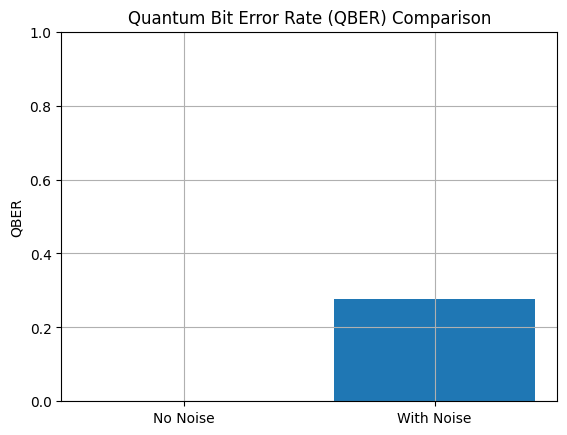

In [ ]:
##### Noise

n = 100
alice_bits, alice_bases = generate_bits_and_bases(n)
alice_circuits = encode_qubits(alice_bits, alice_bases)
intercepted_circuits = alice_circuits  # No Eve for now
bob_bases = [random.choice([_ , _]) for _ in range(n)] # hint: 'Z' and 'X'

# Run without noise
bob_results_no_noise = bob_measures(intercepted_circuits, bob_bases)
key_a_no_noise, key_b_no_noise = sift_keys(alice_bits, alice_bases, bob_results_no_noise, bob_bases)
qber_no_noise = compute_qber(key_a_no_noise, key_b_no_noise)

# Add depolarizing noise model
noise_model = NoiseModel()
error = depolarizing_error(0.1, 1)  # 10% noise
noise_model.add_all_qubit_quantum_error(error, ['x', 'h'])

# Run with noise
bob_results_with_noise = bob_measures(intercepted_circuits, bob_bases, noise_model=noise_model)
key_a_noise, key_b_noise = sift_keys(alice_bits, alice_bases, bob_results_with_noise, bob_bases)
qber_with_noise = compute_qber(key_a_noise, key_b_noise)



# Step 8: Visualize QBER
**What we're doing:**
We plot the QBER from two experiments:

No noise

With 10% depolarizing noise

**Why it matters:**
This visual helps you understand how even small amounts of noise affect the accuracy and reliability of QKD systems.

In [ ]:
# Visualize QBER
labels = ['No Noise', 'With Noise']
qbers = [qber_no_noise, qber_with_noise]

plt.bar(labels, qbers)
plt.title("Quantum Bit Error Rate (QBER) Comparison")
plt.ylabel("QBER")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
print(f"QBER without noise: {qber_no_noise:.2f}")
print(f"QBER with noise:    {qber_with_noise:.2f}")

In [ ]:
# ########## Optional: uncomment to see the effect of eve_intercepts
# # Step 7: Run full protocol
# n = 100
# alice_bits, alice_bases = generate_bits_and_bases(n)
# alice_circuits = encode_qubits(alice_bits, alice_bases)

# # Simulate Eve (comment next 2 lines to disable Eve)
# eve_bases = [random.choice(['Z', 'X']) for _ in range(n)]
# intercepted_circuits = eve_intercepts(alice_circuits, eve_bases)

# # Use Alice's original circuits if Eve is inactive:
# # intercepted_circuits = alice_circuits

# bob_bases = [random.choice(['Z', 'X']) for _ in range(n)]
# bob_results = bob_measures(intercepted_circuits, bob_bases)

# key_alice, key_bob = sift_keys(alice_bits, alice_bases, bob_results, bob_bases)
# qber = compute_qber(key_alice, key_bob)

# print(f"Sifted Key Length: {len(key_alice)}")
# print(f"Key Alice: {key_alice}")
# print(f"Key Bob:   {key_bob}")
# print(f"QBER: {qber:.2f}")
